In [1]:
!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

# 그래프 크기 고정
plt.rcParams["figure.figsize"] = (12, 9)

# 음수 기호가 깨지는 것을 방지
plt.rcParams['axes.unicode_minus'] = False

In [10]:
import pandas as pd

KRVideos = pd.read_csv('/content/drive/MyDrive/멀티캠퍼스 9회차 I반/05데이터 분석/KR_youtube_trending_data.csv')

KRVideos.tail()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
115749,q_cO8w1FIz0,세계여행중인 35세 남녀의 옥탑방 로맨스,2022-03-13T09:10:11Z,UCaoqDZPllYXLAH_5OBRLLrw,채코제 Channel Korean Jay,19,2022-03-24T00:00:00Z,세계여행|여행|travel|trip|worldtravel|hoilday|세계일주,562393,11351,0,1706,https://i.ytimg.com/vi/q_cO8w1FIz0/default.jpg,False,False,그리고 미국으로 이민 가버린 그녀..--------------------------...
115750,2HlSwKWa4tI,짜파게티의 진정한 고수,2022-03-11T08:17:48Z,UC5ZqaJ9klJrwgsKjYW42JtA,원샷한솔OneshotHansol,22,2022-03-24T00:00:00Z,짜파게티|짜장라면|짜짜로니|요리|레시피|짜파게티 맛있게 끓이는 법|짜파게티 요리|라...,1766127,41224,0,1153,https://i.ytimg.com/vi/2HlSwKWa4tI/default.jpg,False,False,#라면 #요리 #시각장애인🥰 원샷한솔 (김한솔) 인스타그램 : https://ins...
115751,S4wGXNvFCVo,겨울느낌으로 실링왁스 찍기#shorts,2022-03-12T00:27:36Z,UCwUM80AX6vrT_psxumQ6A9Q,정소영이☆,22,2022-03-24T00:00:00Z,[None],730557,16942,0,0,https://i.ytimg.com/vi/S4wGXNvFCVo/default.jpg,True,False,NaN
115752,DQutPjiioKE,iKON - '직진 (JIKJIN)' COVER PERFORMANCE,2022-03-12T15:00:06Z,UCWxCyZibDIWIrGIgP25mbfw,iKON,10,2022-03-24T00:00:00Z,YG Entertainment|YG|와이지|K-pop|iKON|아이콘|김진환|송윤형...,6124899,666875,0,56970,https://i.ytimg.com/vi/DQutPjiioKE/default.jpg,False,False,#iKON #아이콘 #TREASURE #트레저 #직진 #JIKJIN #JIKJIN_...
115753,JY-gJkMuJ94,겨울봄 (Winter Spring) MV - 이세계아이돌 (ISEGYE IDOL),2022-03-11T09:00:12Z,UCzh4yY8rl38knH33XpNqXbQ,왁타버스 WAKTAVERSE,10,2022-03-24T00:00:00Z,우왁굳|왁굳|왁두|왁카데미|마크|마인크래프트|마인크래프트 집짓기|마인크래프트 건축|...,1701699,55804,0,11781,https://i.ytimg.com/vi/JY-gJkMuJ94/default.jpg,False,False,겨울봄 (Winter Spring) MV - 이세계아이돌 (ISEGYE IDOL)음...


In [11]:

KRVideos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115754 entries, 0 to 115753
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           115754 non-null  object
 1   title              115754 non-null  object
 2   publishedAt        115754 non-null  object
 3   channelId          115754 non-null  object
 4   channelTitle       115754 non-null  object
 5   categoryId         115754 non-null  int64 
 6   trending_date      115754 non-null  object
 7   tags               115754 non-null  object
 8   view_count         115754 non-null  int64 
 9   likes              115754 non-null  int64 
 10  dislikes           115754 non-null  int64 
 11  comment_count      115754 non-null  int64 
 12  thumbnail_link     115754 non-null  object
 13  comments_disabled  115754 non-null  bool  
 14  ratings_disabled   115754 non-null  bool  
 15  description        112458 non-null  object
dtypes: bool(2), int64(5)

In [12]:
KRVideos.isnull().sum()

video_id                0
title                   0
publishedAt             0
channelId               0
channelTitle            0
categoryId              0
trending_date           0
tags                    0
view_count              0
likes                   0
dislikes                0
comment_count           0
thumbnail_link          0
comments_disabled       0
ratings_disabled        0
description          3296
dtype: int64

# 유튜브 인기채널 분석

In [15]:
# 조회수 = view_count 조회수가 높으면 인기동영상일거다! 가설세우고 해보자
cols = ['title','channelTitle', 'view_count']
df = KRVideos[cols]
df.head()

,title,channelTitle,view_count
0,안녕하세요 보겸입니다,보겸 BK,5947503
1,부락토스의 계획 [총몇명 프리퀄],총몇명,963384
2,평생 반성하면서 살겠습니다.,양팡 YangPang,2950885
3,안녕하세요 꽈뚜룹입니다.,꽈뚜룹 Quaddurup,1743374
4,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,JYP Entertainment,3433885


In [16]:
# 조회수 내림차순 정렬
df_sorted = df.sort_values(by='view_count', ascending=False)
df_sorted.head()

,title,channelTitle,view_count
55138,BTS (방탄소년단) 'Butter' Official MV,HYBE LABELS,296314174
54938,BTS (방탄소년단) 'Butter' Official MV,HYBE LABELS,292502967
54729,BTS (방탄소년단) 'Butter' Official MV,HYBE LABELS,289350312
54519,BTS (방탄소년단) 'Butter' Official MV,HYBE LABELS,285698612
54284,BTS (방탄소년단) 'Butter' Official MV,HYBE LABELS,282265069


In [17]:
df_sorted.tail()

# 중복데이터 필요없다!
# 10/21 120회
# 10/20 100회 에서 120회만 뽑아오면된다.

,title,channelTitle,view_count
47909,Earth Day 2021 Doodle,GoogleDoodles,0
47461,Earth Day 2021 Doodle,GoogleDoodles,0
25512,Hello 2021 Korea | 크리에이터와 함께하는 Goodbye 2020,YouTube Korea,0
25081,Hello 2021 Korea | 크리에이터와 함께하는 Goodbye 2020,YouTube Korea,0
24599,Hello 2021 Korea | 크리에이터와 함께하는 Goodbye 2020,YouTube Korea,0


In [21]:
# drop_duplicates
df_drop_sorted = df_sorted.drop_duplicates(["title", "channelTitle"], keep ="first")
df_drop_sorted

,title,channelTitle,view_count
55138,BTS (방탄소년단) 'Butter' Official MV,HYBE LABELS,296314174
2733,BTS (방탄소년단) 'Dynamite' Official MV,Big Hit Labels,262319276
67539,BTS (방탄소년단) 'Permission to Dance' Official MV,HYBE LABELS,194795844
79542,LISA - 'LALISA' M/V,BLACKPINK,192376395
3426,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,BLACKPINK,184778248
...,...,...,...
2989,[싸꼰_LIVE] 사사건건 풀방송 라이브_373일차_0901(화),「싸꼰」사사건건,17294
871,[싸꼰_LIVE] 사사건건 풀방송 라이브_364일차_0818(화),「싸꼰」사사건건,16957
6465,"[정면]'국시보겠다'면서, 사과없는 의대생들- 신장식 변호사, 유지만 시사저널 기자...",YTN 라디오,15845
25735,Hello 2021 Korea | 크리에이터와 함께하는 Goodbye 2020,YouTube Korea,0


### 인기채널순위구하자!
우리는 조회수가 높으면 인기채널일거다로 가설세웠음

In [24]:
dff = df_drop_sorted.groupby('channelTitle').sum().sort_values(by='view_count', ascending=False)
dff

,view_count
channelTitle,
SMTOWN,1221875381
BLACKPINK,1067326881
HYBE LABELS,1009696746
JYP Entertainment,927834325
BANGTANTV,924092048
...,...
STUDIO 4BPM,26122
율리예스,24643
트레져헌터,23354


In [27]:
df_top100 = dff[ :100]
df_top100

,view_count
channelTitle,
SMTOWN,1221875381
BLACKPINK,1067326881
HYBE LABELS,1009696746
JYP Entertainment,927834325
BANGTANTV,924092048
...,...
KBS동물티비 : 애니멀포유 animal4u,50663285
모비딕 Mobidic,50568900
MayTree,49916247


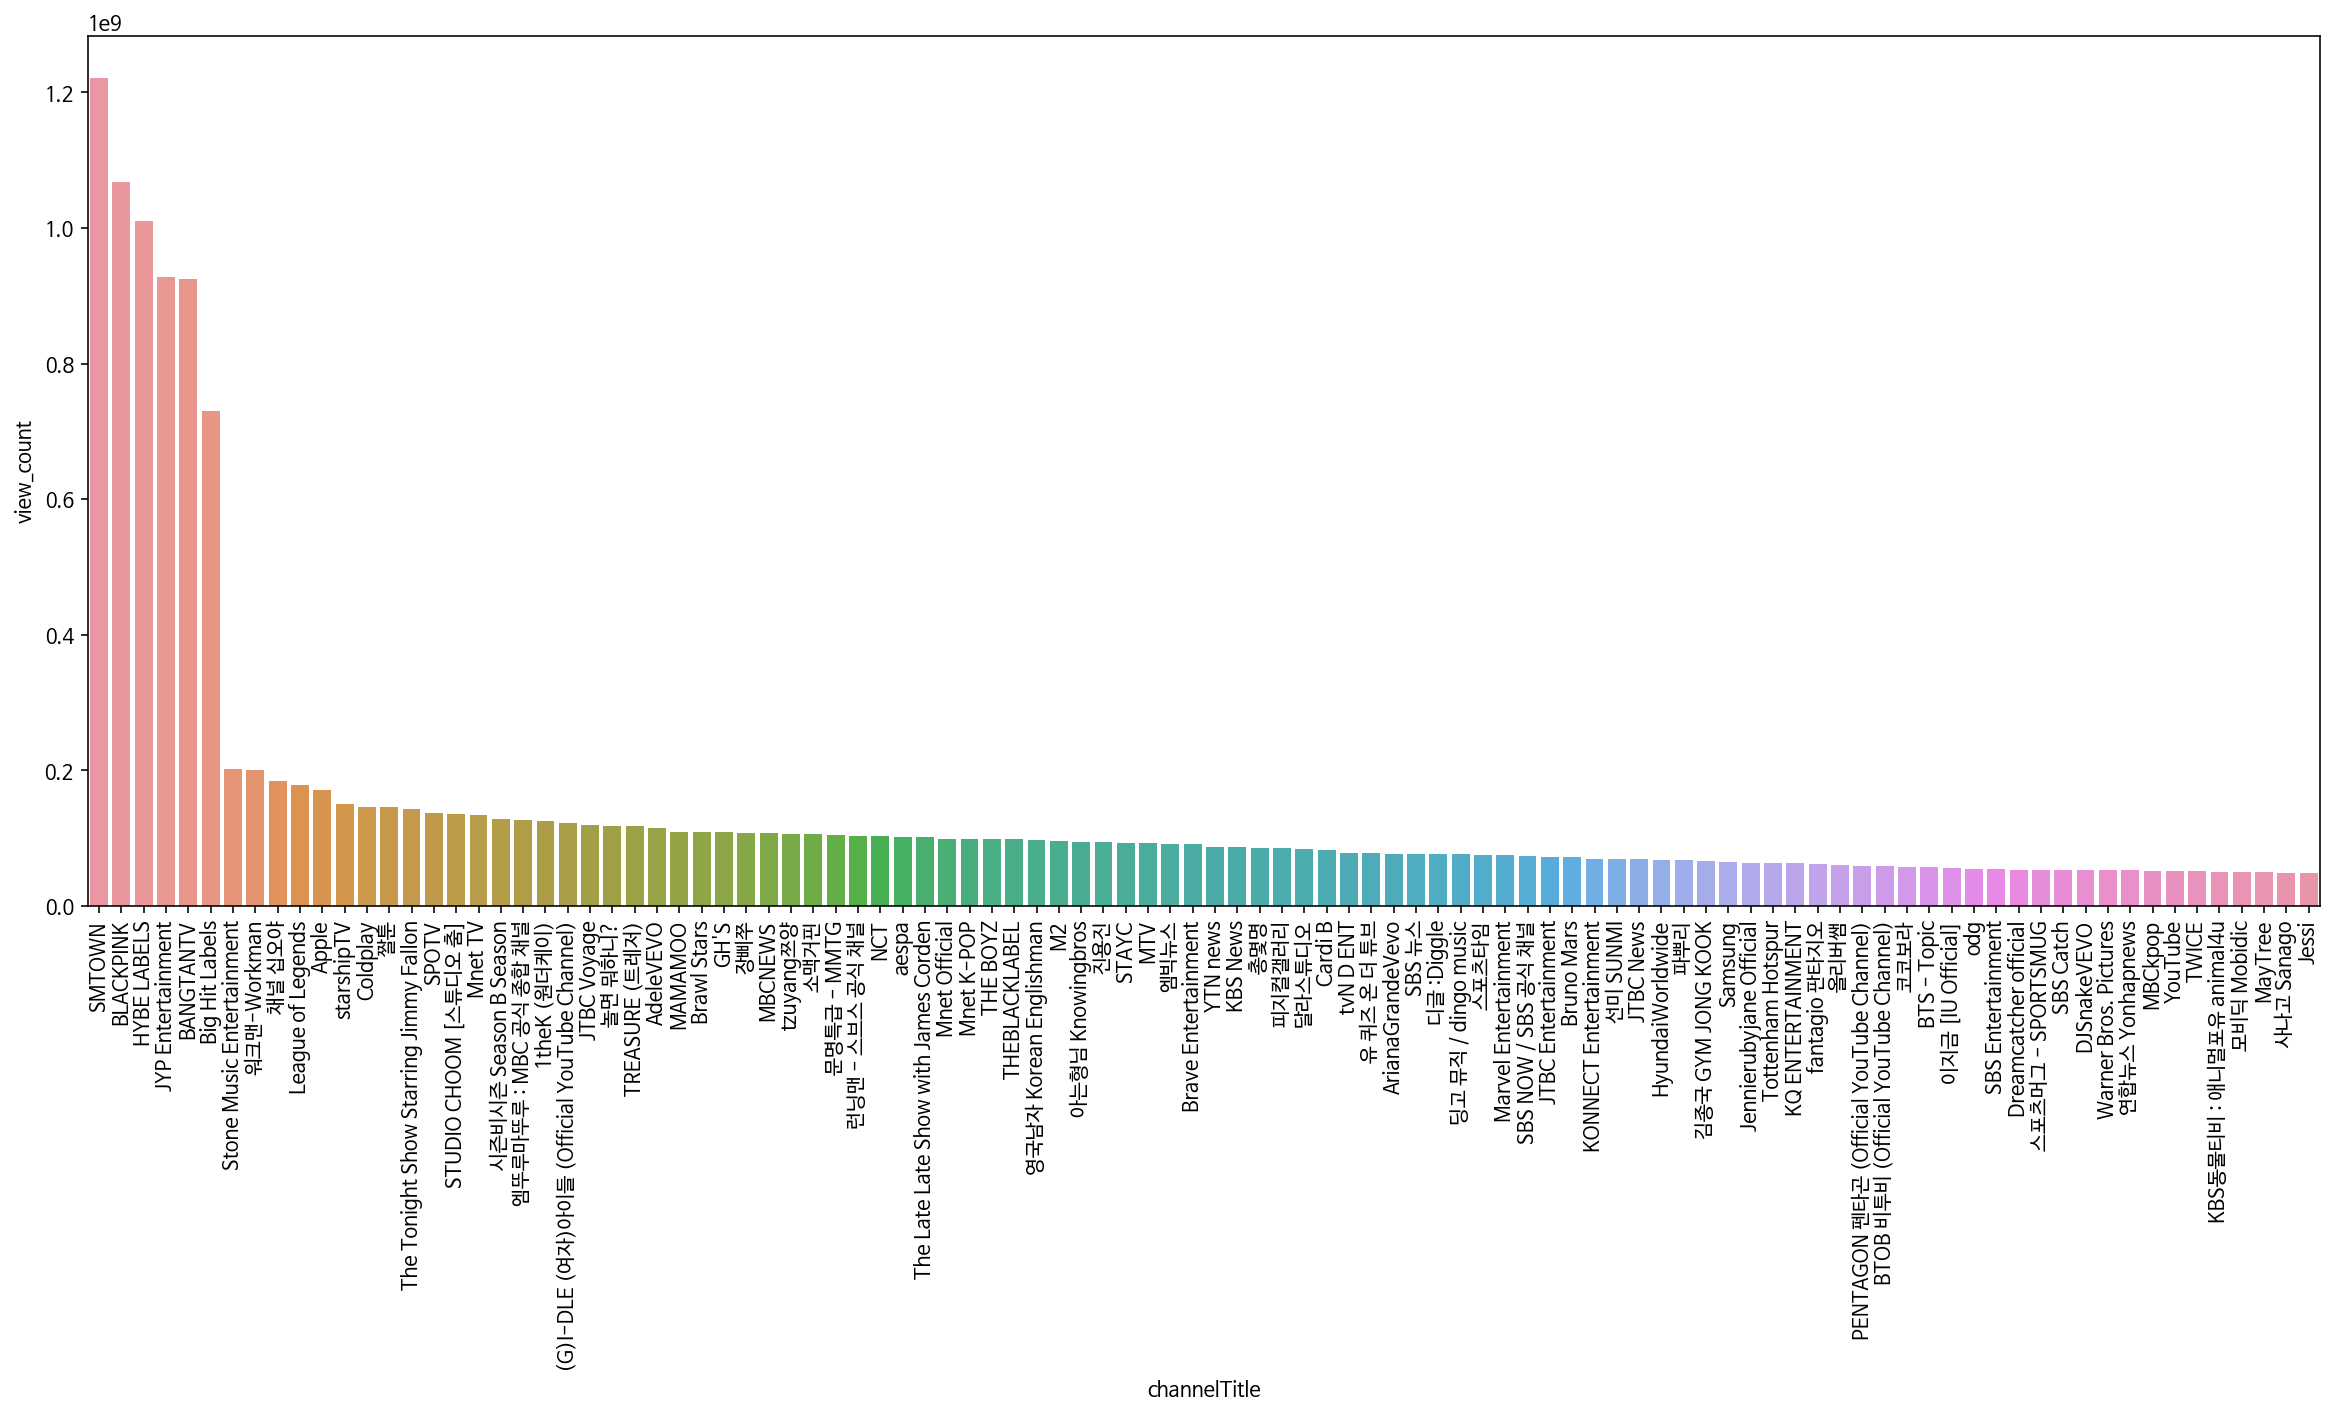

In [29]:
import seaborn as sns

plt.figure(figsize=(20,8))

sns.barplot(x=df_top100.index, y="view_count", data=df_top100)
plt.xticks(rotation=90)
plt.show()